In [45]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(font_scale=1.5)

In [46]:
targhe = [
"FY293YC", "FY295YC", "FY298YC", "FY294YC", "FY296YC", "FV903SK", "FV904SK", "FV906SK", "FV907SK", "FV908SK", "FZ330SC", "FV913SK", "FV914SK", "FY402YC", "FY403YC", "ZB477AN", "ZB473AN", "ZB474AN", "ZB476AN", "ZB475AN", "ZB478AN", "ZB137AR", "ZB139AR", "ZB150AR", "ZB127AR", "ZB132AR", "ZB128AR", "ZB131AR", "ZB130AR", "FY400YC", "ZB135AR", "ZB136AR", "ZB134AR", "ZB373AN", "FY401YC", "CW363HC", "CW367HC", "FP698BP", "FP699BP", "CW365HC", "CW368HC", "CN433CA", "FV989FV", "FV990FV", "FV991FV", "FV995FV", "FV996FV", "FV997FV", "FV992FV", "FV985FV", "FV987FV", "FV988FV", "FV993FV", "FV994FV", "EG181YE", "FV986FV", "EN971TN", "FY299YC", 
]

In [47]:
data = pd.read_excel ("Dati_Scania.xlsx")
data.shape

(26085, 67)

In [48]:
data = data.drop_duplicates().reset_index().drop(columns=['index'])
data

,AnticipationScaniaDriverSupport,AverageFuelConsumption,AverageFuelDriveAndIdleCompareSign,AverageFuelDriveAndIdleValue,AverageSpeed,AverageTransportWorkCompareSign,AverageTransportWorkValue,AverageWeight,BrakeApplications,BrakeApplicationsTLCompareSign,...,TotalFuelConsumption,TotalFuelConsumptionIdling,TotalFuelConsumptionPto,TotalGasIdle,TotalGasPto,TotalGasUsed,TransportWork,UseOfBrakesScaniaDriverSupport,Vin,Nome_file
0,33.0,43.7,≤,43.7,11.9,≥,65.0,27.0,448,≤,...,60,1,17,0.0,0.0,0.0,2695.0,43.0,YS2P6X20009242741,2021-07-24-11
1,48.0,47.6,≤,47.6,21.3,≥,52.0,24.0,551,≤,...,48,1,3,0.0,0.0,0.0,2240.0,NaN,YS2P6X20009243357,2021-07-24-11
2,51.0,28.9,≤,28.9,23.3,≥,67.0,18.0,328,≤,...,40,1,8,0.0,0.0,0.0,2021.0,NaN,YS2P6X20009243797,2021-07-24-11
3,NaN,32.7,≤,32.7,14.9,≥,51.0,15.0,831,≤,...,54,3,11,NaN,NaN,NaN,1997.0,NaN,YS2P4X20009247867,2021-07-24-11
4,0.0,33.0,≤,33.0,12.1,≥,47.0,15.0,676,≤,...,35,1,10,NaN,NaN,NaN,1160.0,NaN,YS2P4X20009247986,2021-07-24-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26080,NaN,43.6,≤,43.6,9.9,≥,35.0,14.0,629,≤,...,37,2,10,NaN,NaN,NaN,885.0,NaN,YS2P4X20009249011,2021-09-08-19
26081,NaN,28.7,≤,28.7,18.1,≥,45.0,12.0,139,≤,...,11,1,2,NaN,NaN,NaN,395.0,NaN,YS2P4X20009249086,2021-09-08-19
26082,57.0,33.2,≤,33.2,8.5,≥,66.0,20.0,702,≤,...,53,3,24,NaN,NaN,NaN,1761.0,NaN,YS2P6X20009251379,2021-09-08-19
26083,55.0,26.8,≤,26.8,25.2,≥,78.0,21.0,700,≤,...,95,2,16,NaN,NaN,NaN,6016.0,NaN,YS2P6X20009251407,2021-09-08-19


In [49]:
fatture = pd.read_excel("fatture.xlsx")
fatture

,Unnamed: 0,Targa,Telaio,Descrizione,Km,Apertura_commessa,Anno,Importo,Tipo_manutenzione,Manutenzione_struttura,Descrizione.1,Commento,Colonna1,"(0, 'Descrizione')"
0,0,FV903SK,YS2P4X20009249086,Compattatore,26040.0,2020-01-24,2020,561.31,Ordinaria,Telaio,NaN,NaN,NaN,Compattatore
1,1,FV903SK,YS2P4X20009249086,Compattatore,31644.0,2020-03-31,2020,227.75,Ordinaria,Telaio,NaN,NaN,NaN,Compattatore
2,2,FV903SK,YS2P4X20009249086,Compattatore,NaN,2020-09-15,2020,445.61,Ordinaria,Telaio,NaN,NaN,NaN,Compattatore
3,3,FV903SK,YS2P4X20009249086,Compattatore,26040.0,2021-02-10,2021,561.31,Ordinaria,Telaio,NaN,NaN,NaN,Compattatore
4,4,FV903SK,YS2P4V20009249086,Compattatore,NaN,2021-03-31,2021,207.40,Ordinaria,Telaio,NaN,(è cambiato id telaio sul file Elenco_Veicoli ...,NaN,Compattatore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,486,FV997FV,ZAPS90AGW00002647,Vasca,40171.0,2021-03-26,2021,155.66,Ordinaria,Telaio,NaN,NaN,NaN,Compattatore
487,487,FP699BP,ZAPS90AGW00002017,Vasca,NaN,2021-09-30,2021,4469.00,NaN,NaN,NaN,NaN,NaN,Compattatore
488,488,FV993FV,ZAPS90CGW00003404,Vasca,70396.0,2021-09-30,2021,116.01,Ordinaria,Telaio,NaN,NaN,NaN,Compattatore
489,489,FV995FV,ZAPS90AGW00002634,Vasca,NaN,2021-09-30,2021,163.85,Ordinaria,Telaio,NaN,NaN,NaN,Compattatore


In [68]:
dic = {}
for name in data['LicensePlate'].unique():
    if name in targhe:
        print(name)
        fatture_truck = fatture[(fatture['Targa']==name) & (fatture['Apertura_commessa']>'2021-05-26') & (fatture['Apertura_commessa']<'2021-09-22')].shape[0]
        print(fatture_truck)
        dic[name] = fatture_truck

FV908SK
4
FV907SK
6
FV906SK
0
FZ330SC
4
FV904SK
0
FV903SK
3
FV913SK
4
FV914SK
0


In [69]:
sorted_dict = dict(sorted(dic.items(), key=lambda item: item[1], reverse=True))

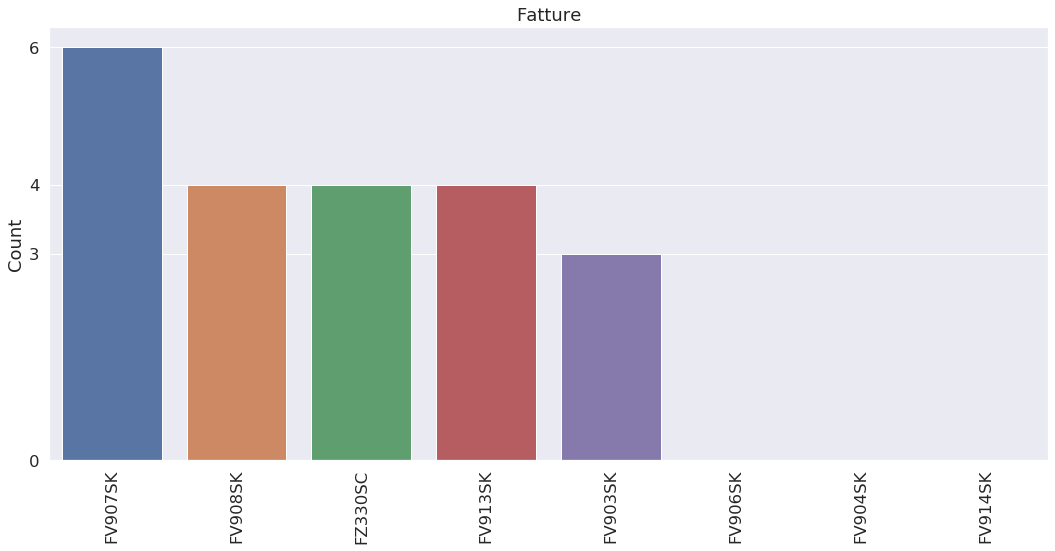

In [71]:
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.5)

keys = list(sorted_dict.keys())
vals = [sorted_dict[k] for k in keys]
fig, ax = plt.subplots(figsize=(15,8))
x = sns.barplot(x=keys, y=vals)
x.set_title('Fatture')
x.set_ylabel('Count')
x.set_yticks([0,3,4,6])
for item in x.get_xticklabels():
    item.set_rotation(90)

plt.tight_layout()
plt.savefig("Fatture_count")

In [64]:
fatture_view = fatture[(fatture['Targa'].isin(data['LicensePlate'].unique())) & (fatture['Apertura_commessa']>'2021-05-26') & (fatture['Apertura_commessa']<'2021-09-22')]
fatture_view

,Unnamed: 0,Targa,Telaio,Descrizione,Km,Apertura_commessa,Anno,Importo,Tipo_manutenzione,Manutenzione_struttura,Descrizione.1,Commento,Colonna1,"(0, 'Descrizione')"
46,46,FV907SK,YS2P4X20009247986,Compattatore,14477.0,2021-05-28,2021,159.60,Ordinaria,Attrezzatura,NaN,dati prelevati dal sensore,NaN,Compattatore
56,56,FV907SK,YS2P4X20009247986,Compattatore,14533.0,2021-05-31,2021,78.08,Ordinaria,Telaio,NaN,NaN,NaN,Compattatore
57,57,FV907SK,YS2P4X20009247986,Compattatore,60440.0,2021-05-31,2021,2369.55,Ordinaria,Telaio,NaN,NaN,NaN,Compattatore
110,110,FV908SK,YS2P4X20009247867,Compattatore,NaN,2021-06-24,2021,191.05,Ordinaria,Attrezzatura,NaN,NaN,NaN,Compattatore
111,111,FZ330SC,YS2P4X20009248881,Compattatore,53972.0,2021-06-24,2021,43.31,Ordinaria,Telaio,NaN,NaN,NaN,Compattatore
113,113,FV913SK,YS2P6X20009251379,Compattatore,54264.0,2021-06-25,2021,45.75,Ordinaria,Telaio,NaN,NaN,NaN,Compattatore
127,127,FV908SK,YS2P4X20009247867,Compattatore,60560.0,2021-06-29,2021,4120.16,Straordinaria,Attrezzatura/Telaio,NaN,Urto,NaN,Compattatore
131,131,FV903SK,YS2P4V20009249086,Compattatore,65369.0,2021-06-30,2021,789.84,Ordinaria,Telaio,NaN,(è cambiato id telaio sul file Elenco_Veicoli ...,NaN,Compattatore
141,141,FV907SK,YS2P4X20009247986,Compattatore,15367.0,2021-06-30,2021,1861.45,Ordinaria,Telaio,NaN,NaN,NaN,Compattatore
142,142,FZ330SC,YS2P4X20009248881,Compattatore,53186.0,2021-06-30,2021,60.39,Ordinaria,Telaio,NaN,NaN,NaN,Compattatore


In [65]:
data['date'] = data['Nome_file'].str.strip().str[:10]
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['date']

0       2021-07-24
1       2021-07-24
2       2021-07-24
3       2021-07-24
4       2021-07-24
           ...    
26080   2021-09-08
26081   2021-09-08
26082   2021-09-08
26083   2021-09-08
26084   2021-09-08
Name: date, Length: 26085, dtype: datetime64[ns]

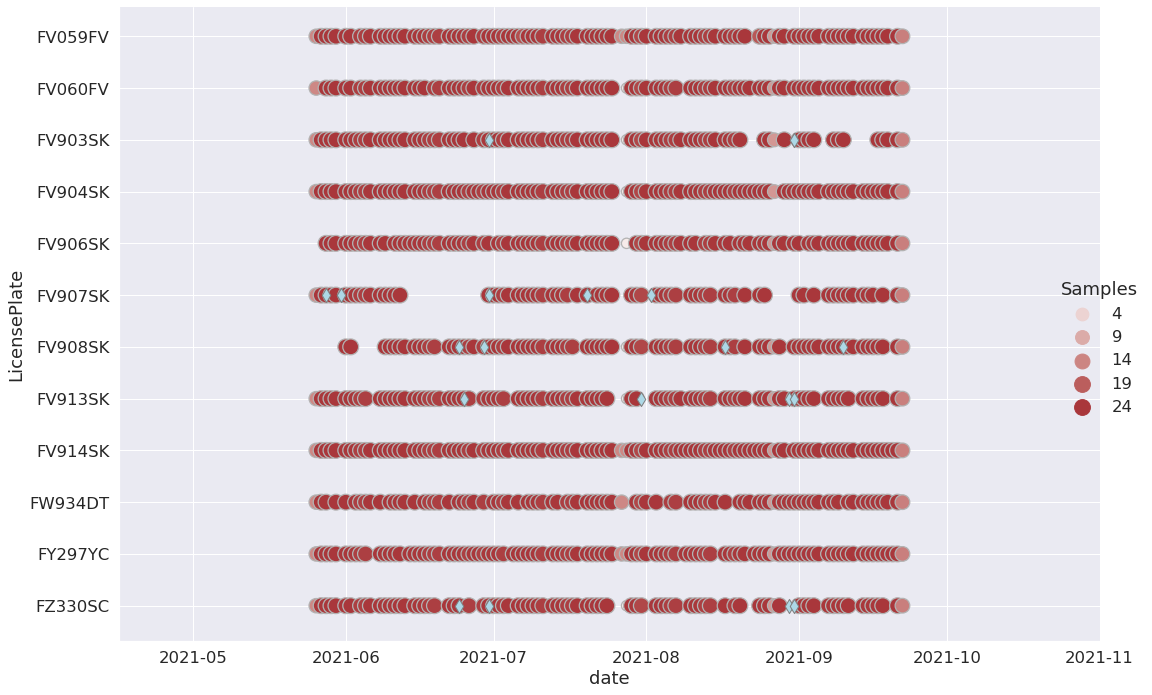

In [67]:
tmp = data.groupby(["LicensePlate", "date"], as_index=False).StartDate.count()
tmp['c'] = tmp.StartDate / tmp.StartDate.max()

g = sns.relplot(
    data=tmp,
    x="date", y="LicensePlate", hue="c", size="c",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8), aspect=1.5
)

plt.scatter(data=fatture_view, x="Apertura_commessa", y="Targa", marker="d", s=100, c="lightblue", edgecolors="grey")

for t in g._legend.get_texts():
    t.set_text(int(float(t.get_text())*tmp.StartDate.max()))
g._legend.set_title("Samples")
plt.tight_layout()
plt.savefig("Tempo.png")

In [14]:
gb_truck_date = data.groupby([pd.Grouper('LicensePlate'), pd.Grouper('date')]).agg({'Nome_file': 'count'}).rename(columns={'Nome_file':'count'})
gb_truck_date = gb_truck_date.reset_index()
gb_truck_date

,LicensePlate,date,count
0,FV059FV,2021-05-26,14
1,FV059FV,2021-05-27,24
2,FV059FV,2021-05-28,24
3,FV059FV,2021-05-29,24
4,FV059FV,2021-05-30,24
...,...,...,...
1114,FZ330SC,2021-09-16,24
1115,FZ330SC,2021-09-17,24
1116,FZ330SC,2021-09-18,24
1117,FZ330SC,2021-09-21,24


In [15]:
gb_truck_date['count'].value_counts()

24    881
23    178
14     17
15     12
22     11
12     11
2       7
21      1
20      1
Name: count, dtype: int64

/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


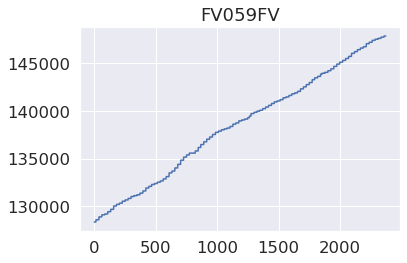

19527


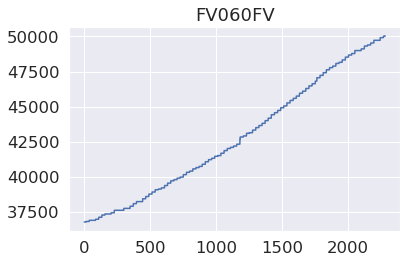

13255


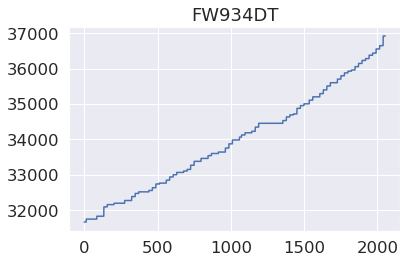

5263


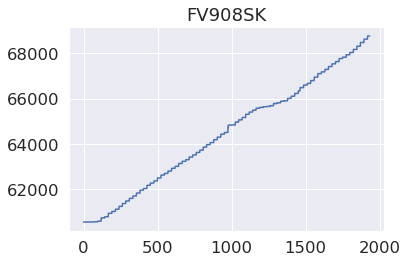

8204


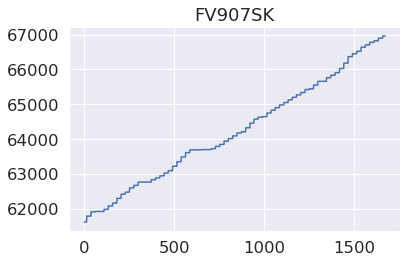

5343


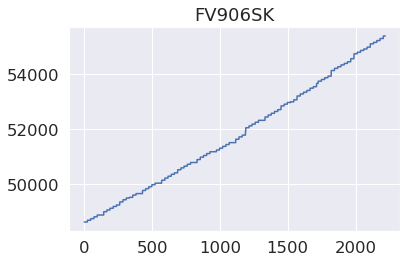

6748


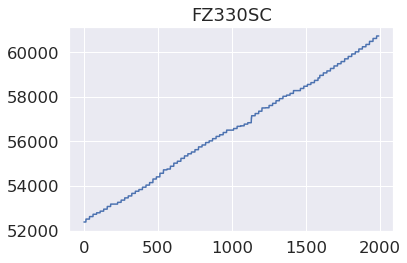

8344


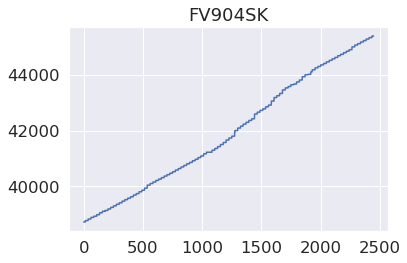

6670


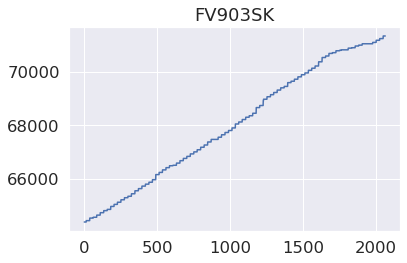

6971


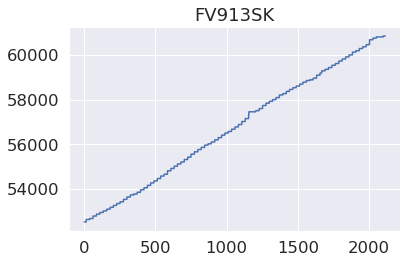

8324


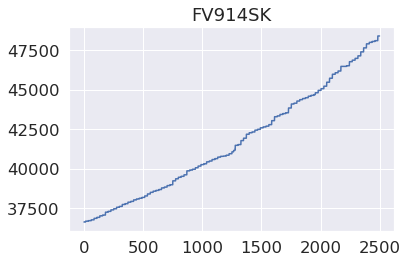

11765


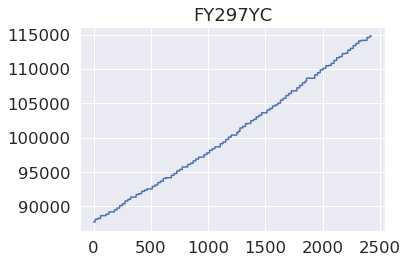

27067


In [16]:
mydict = {}
for name in data['LicensePlate'].unique():
    data_truck = data[data['LicensePlate'] == name].copy()
    data_truck = data_truck.sort_values(["Nome_file", "StartDate"]).reset_index().drop(columns=['index'])
    distinct_odometer = len(data_truck['Odometer'].unique())
    mydict[name] = distinct_odometer
    sns.set_style("darkgrid")
    plt.plot(range(data_truck.shape[0]), data_truck['Odometer'])
    plt.title(name)
    plt.tight_layout()
    #plt.savefig(name+"_odometer.png")
    plt.show()
    print(data_truck['Odometer'].iloc[-1] - data_truck['Odometer'].iloc[0])
    

sorted_dict = dict(sorted(mydict.items(), key=lambda item: item[1], reverse=True))

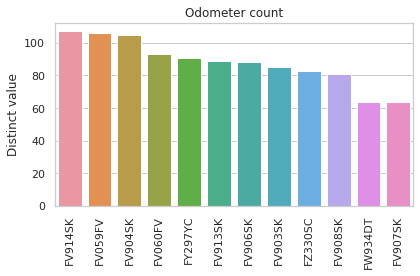

In [121]:
sns.set_theme(style="whitegrid")

keys = list(sorted_dict.keys())
vals = [sorted_dict[k] for k in keys]
x = sns.barplot(x=keys, y=vals)
x.set_title('Odometer count')
x.set_ylabel('Distinct value')
for item in x.get_xticklabels():
    item.set_rotation(90)

plt.tight_layout()
plt.savefig("Odometer_count")

In [122]:
### PREPROCESSING

col_to_delete = []

for c in data.columns:
    if (data[c].isna().sum() > 13000):
        col_to_delete.append(c)
        print(c, data[c].isna().sum() )
        print()


ChoiceOfGearScaniaDriverSupport 25042

DistanceWithTrailer 16950

DrivingOutsideOptimumEngineSpeedValue 19425

HillDrivingScaniaDriverSupport 16968

MaxEngineSpeed 20970

MaxVehicleSpeed 20970

TotalGasIdle 19377

TotalGasPto 19377

TotalGasUsed 19377

UseOfBrakesScaniaDriverSupport 21773



In [123]:
data = data.drop(col_to_delete, axis=1)
print(data.shape)

(26085, 58)


In [124]:
col_to_delete = []

for c in data.columns:
    if (len(data[c].value_counts()) == 1):
        col_to_delete.append(c)

col_to_delete

['AverageFuelDriveAndIdleCompareSign',
 'AverageTransportWorkCompareSign',
 'BrakeApplicationsTLCompareSign',
 'CoastingCompareSign',
 'CoastingInNeutral',
 'DrivingOutsideOptimumEngineSpeedCompareSign',
 'DrivingWithVehicleWarningCompareSign',
 'EngineOverSpeedCompareSign',
 'EngineRuntimePause',
 'HarshAccelerationsCompareSign',
 'HarshBrakeApplicationsTLCompareSign',
 'IdlingCompareSign',
 'PerformanceModeOffRoadPercentage',
 'ScaniaDriverSupportCompareSign',
 'SpeedingCompareSign',
 'TotalDistanceWithPerformanceModeOffRoad']

In [125]:
data = data.drop(col_to_delete, axis=1)
data.shape

(26085, 42)

In [126]:
list(data.columns)

['AnticipationScaniaDriverSupport',
 'AverageFuelConsumption',
 'AverageFuelDriveAndIdleValue',
 'AverageSpeed',
 'AverageTransportWorkValue',
 'AverageWeight',
 'BrakeApplications',
 'BrakeApplicationsTLValue',
 'ChassisNumber',
 'CoastingValue',
 'CustomerVehicleName',
 'Distance',
 'DistanceWithCruiseControl',
 'DrivingWithVehicleWarningValue',
 'EngineOverSpeedValue',
 'EngineRunningTime',
 'EngineRuntimeIdle',
 'EngineRuntimePto',
 'FuelConsumptionPerHour',
 'HarshAccelerationsValue',
 'HarshBrakeApplications',
 'HarshBrakeApplicationsTLValue',
 'IdlingValue',
 'LicensePlate',
 'Odometer',
 'PerformanceModeEconomyPercentage',
 'PerformanceModePowerPercentage',
 'PerformanceModeStandardPercentage',
 'ScaniaDriverSupportValue',
 'SpeedingValue',
 'StartDate',
 'StopDate',
 'TotalDistanceWithPerformanceModeEconomy',
 'TotalDistanceWithPerformanceModePower',
 'TotalDistanceWithPerformanceModeStandard',
 'TotalFuelConsumption',
 'TotalFuelConsumptionIdling',
 'TotalFuelConsumptionPto',

In [127]:
data = data.sort_values(["LicensePlate", "Nome_file"]).reset_index().drop(columns=['index'])
data

,AnticipationScaniaDriverSupport,AverageFuelConsumption,AverageFuelDriveAndIdleValue,AverageSpeed,AverageTransportWorkValue,AverageWeight,BrakeApplications,BrakeApplicationsTLValue,ChassisNumber,CoastingValue,...,TotalDistanceWithPerformanceModeEconomy,TotalDistanceWithPerformanceModePower,TotalDistanceWithPerformanceModeStandard,TotalFuelConsumption,TotalFuelConsumptionIdling,TotalFuelConsumptionPto,TransportWork,Vin,Nome_file,date
0,23.0,35.9,35.9,26.2,67.0,23.0,484,257.4,9242741,5.6,...,188,0,0,74,3,6,4329.0,YS2P6X20009242741,2021-05-26-10,2021-05-26
1,23.0,35.9,35.9,26.2,67.0,23.0,484,257.4,9242741,5.6,...,188,0,0,74,3,6,4329.0,YS2P6X20009242741,2021-05-26-11,2021-05-26
2,23.0,35.9,35.9,26.2,67.0,23.0,484,257.4,9242741,5.6,...,188,0,0,74,3,6,4329.0,YS2P6X20009242741,2021-05-26-12,2021-05-26
3,23.0,35.9,35.9,26.2,67.0,23.0,484,257.4,9242741,5.6,...,188,0,0,74,3,6,4329.0,YS2P6X20009242741,2021-05-26-13,2021-05-26
4,23.0,35.9,35.9,26.2,67.0,23.0,484,257.4,9242741,5.6,...,188,0,0,74,3,6,4329.0,YS2P6X20009242741,2021-05-26-14,2021-05-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26080,NaN,30.6,30.6,11.4,50.0,14.0,672,603.3,9248881,3.6,...,111,0,0,49,2,15,1577.0,YS2P4X20009248881,2021-09-22-10,2021-09-22
26081,NaN,30.6,30.6,11.4,50.0,14.0,672,603.3,9248881,3.6,...,111,0,0,49,2,15,1577.0,YS2P4X20009248881,2021-09-22-11,2021-09-22
26082,NaN,30.6,30.6,11.4,50.0,14.0,672,603.3,9248881,3.6,...,111,0,0,49,2,15,1577.0,YS2P4X20009248881,2021-09-22-12,2021-09-22
26083,NaN,30.6,30.6,11.4,50.0,14.0,672,603.3,9248881,3.6,...,111,0,0,49,2,15,1577.0,YS2P4X20009248881,2021-09-22-13,2021-09-22


In [128]:
### MATRICE DI CORRELAZIONE

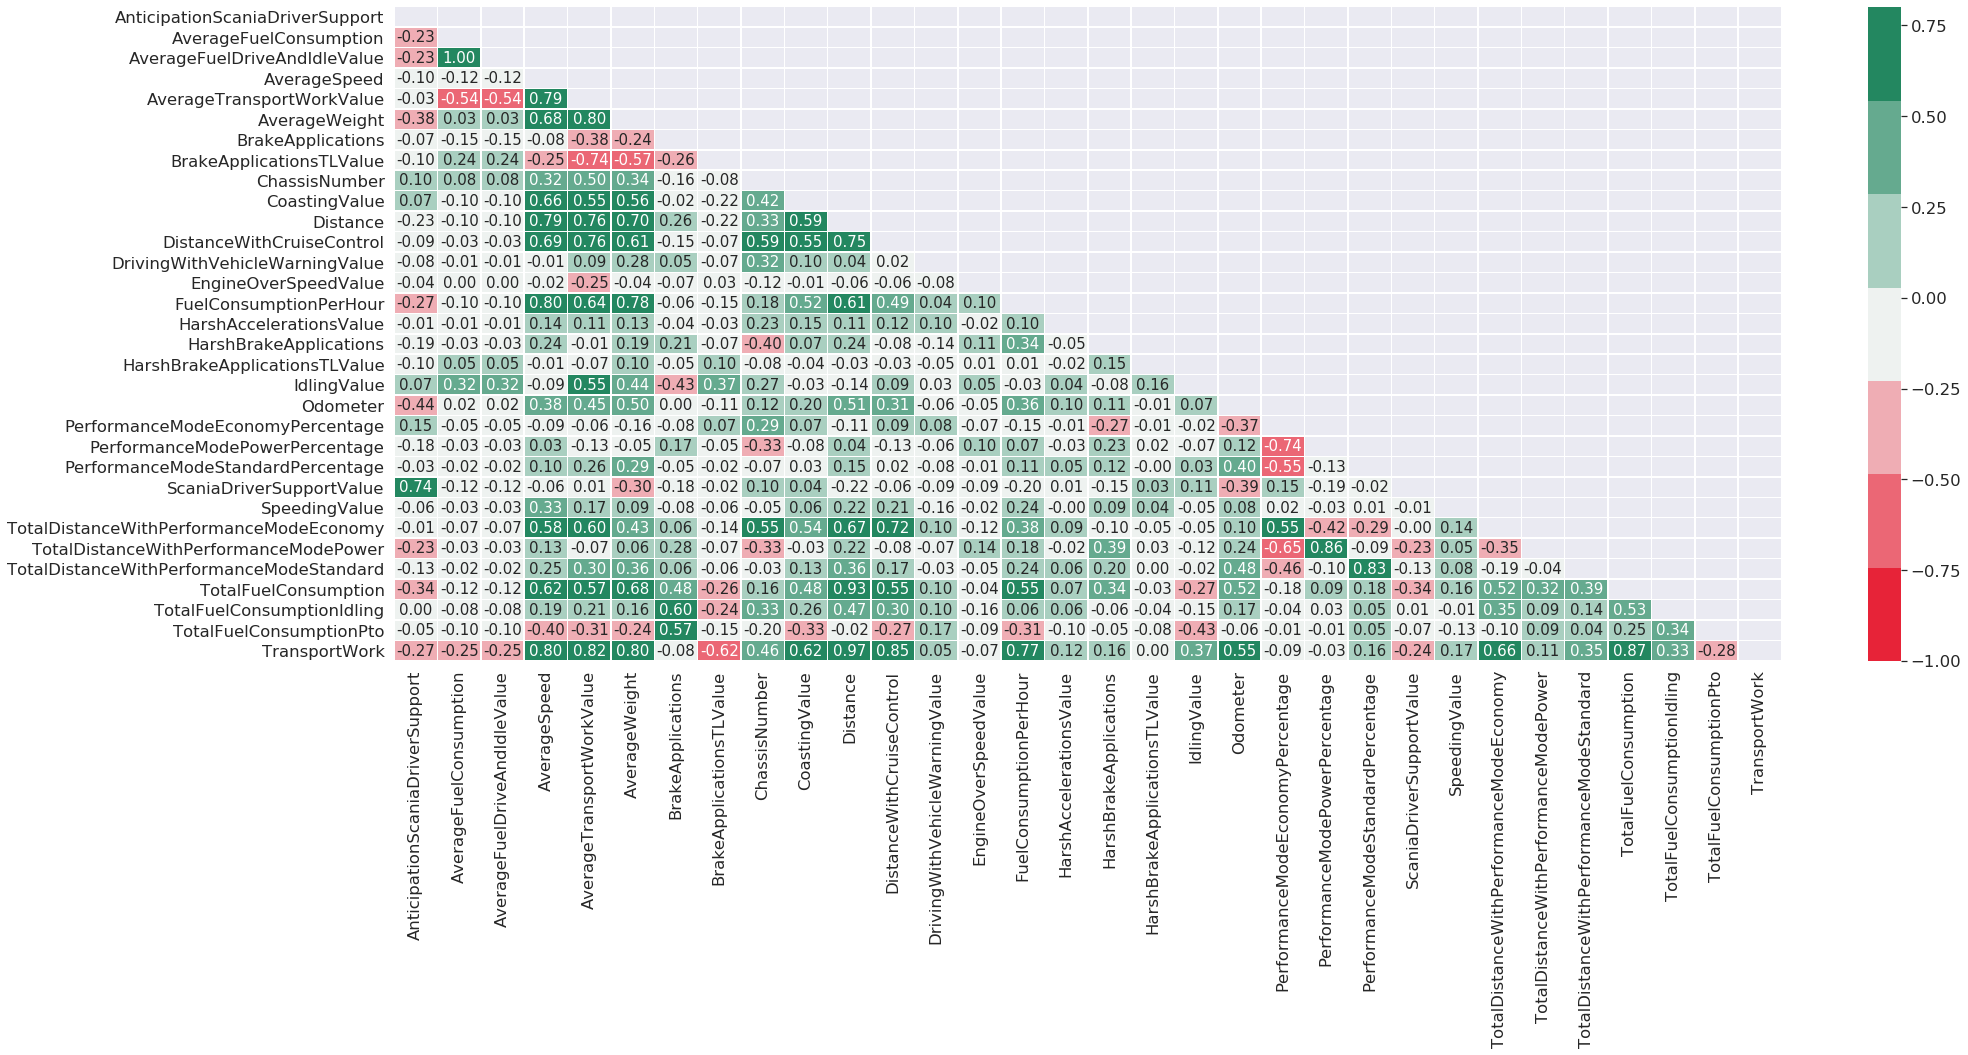

In [129]:
sns.set(font_scale=1.5)
correlations = data.corr()

fig, ax = plt.subplots(figsize=(30,15))
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True
heatmap = sns.heatmap(correlations, annot=True, fmt='.2f', linewidths=0.5,
            mask=mask, ax=ax, cmap=sns.diverging_palette(10, 150, s=90, n=7),
            robust=True, vmin=-1, annot_kws={"size": 15})
plt.tight_layout()
fig.savefig("corr.png")

In [130]:
### PCA ANALYSIS
# - standardizzazione del dataset
# - plot delle principal component
# - estrazione feature più significative per ogni component

In [131]:
from sklearn.preprocessing import StandardScaler
data_std = data[['AnticipationScaniaDriverSupport', 'AverageFuelConsumption', 'AverageFuelDriveAndIdleValue',
 'AverageSpeed', 'AverageTransportWorkValue', 'AverageWeight', 'BrakeApplications', 'BrakeApplicationsTLValue',
 'CoastingValue', 'Distance', 'DistanceWithCruiseControl',
 'DrivingWithVehicleWarningValue', 'EngineOverSpeedValue',
 'FuelConsumptionPerHour', 'HarshAccelerationsValue', 'HarshBrakeApplications',
 'HarshBrakeApplicationsTLValue', 'IdlingValue', 'Odometer', 'PerformanceModeEconomyPercentage',
 'PerformanceModePowerPercentage', 'PerformanceModeStandardPercentage', 'ScaniaDriverSupportValue', 'SpeedingValue',
 'TotalDistanceWithPerformanceModeEconomy', 'TotalDistanceWithPerformanceModePower',
 'TotalDistanceWithPerformanceModeStandard', 'TotalFuelConsumption', 'TotalFuelConsumptionIdling',
 'TotalFuelConsumptionPto', 'TransportWork']].copy()
data_std[data_std.columns] = StandardScaler().fit_transform(data_std[data_std.columns])

In [132]:
from sklearn.decomposition import PCA
#data_std = data_std.fillna(-100)
data_std = data_std.dropna()
pca = PCA(n_components=10)
pca.fit(data_std)
projection = pca.transform(data_std)

In [133]:
pca.explained_variance_ratio_

array([0.31875877, 0.18438269, 0.10880385, 0.09441828, 0.05397391,
       0.04625627, 0.04396878, 0.03193275, 0.02064281, 0.01779313])

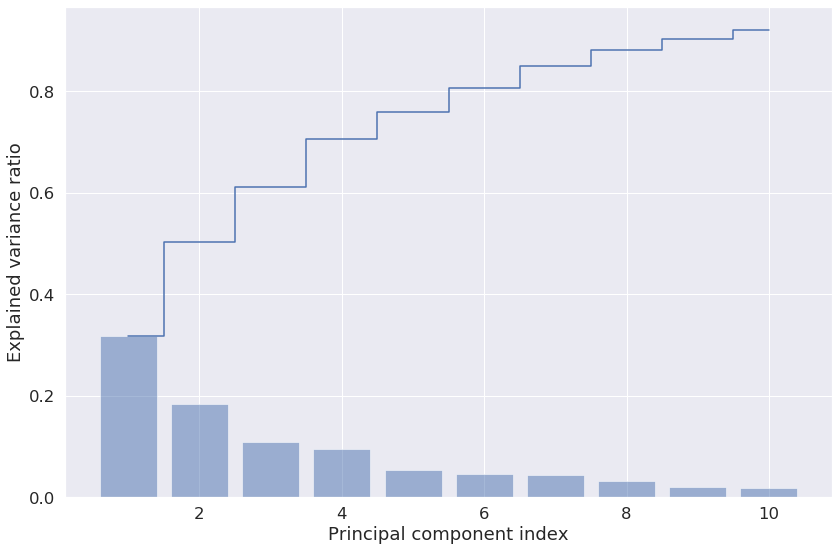

In [134]:
cum_sum_eigenvalues = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(12, 8))
plt.bar(range(1, 11), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, 11), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
#plt.legend(loc='best')
plt.tight_layout()
plt.savefig("PCA_10")
plt.show()

In [135]:
most_important = [np.argpartition(np.abs(pca.components_[i]), -3)[-3:] for i in range(10)]

In [136]:
initial_feature_names = data_std.columns
most_important_names = [initial_feature_names[most_important[i]] for i in range(10)]

In [137]:
most_important_names

[Index(['Distance', 'DistanceWithCruiseControl', 'TransportWork'], dtype='object'),
 Index(['HarshBrakeApplications', 'PerformanceModeEconomyPercentage',
        'TotalDistanceWithPerformanceModeStandard'],
       dtype='object'),
 Index(['TotalDistanceWithPerformanceModePower',
        'PerformanceModeStandardPercentage',
        'TotalDistanceWithPerformanceModeStandard'],
       dtype='object'),
 Index(['DrivingWithVehicleWarningValue', 'TotalFuelConsumptionPto',
        'BrakeApplications'],
       dtype='object'),
 Index(['DrivingWithVehicleWarningValue', 'ScaniaDriverSupportValue',
        'AnticipationScaniaDriverSupport'],
       dtype='object'),
 Index(['DrivingWithVehicleWarningValue', 'CoastingValue', 'SpeedingValue'], dtype='object'),
 Index(['DrivingWithVehicleWarningValue', 'Odometer', 'HarshBrakeApplications'], dtype='object'),
 Index(['DrivingWithVehicleWarningValue', 'HarshBrakeApplications',
        'SpeedingValue'],
       dtype='object'),
 Index(['AnticipationScania